<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/MDS27_DZ7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание "Продвинутая оптимизация".

### Задание
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

Подробнее о результате выдачи тут.

In [3]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [5]:
def get_draw(x,y,xlabel,ylabel,title):
  """
  Построение графика зависимости к-ва итераций (y) 
  от передаваемого параметра (x) 
  """
  plt.plot(x,y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show

In [45]:
# Исходные данные
f_min =1000

strategies =['best1bin', 'best1exp', 'rand1exp','randtobest1exp', 
             'currenttobest1exp','best2exp','rand2exp','randtobest1bin', 
             'currenttobest1bin', 'best2bin','rand2bin', 'rand1bin']
popsize = 0
# Целочисленный множитель для установки общей численности популяции popsize * N   
# Это ключевое слово переопределяется, если начальное заполнение - 
# через ключевое слово init='sobol' .Тогда  Численность популяции рассчитывается как 
# следующая степень числа 2 после popsize * N             
mutations = np.arange(0., 1., 0.1)
# константа мутации. Обычно выбирается из  [0., 2.]

In [46]:
researches = [] # Здесь будут все исследования
research = dict() # Кортеж для одного исследования, по порядку nit, strategy, popsize, mutation, fun
for strategy in strategies:
  for popsize in range (1,100,10):
    for mutation in mutations:
      try:
        result = differential_evolution(ackley, bounds, seed=42,popsize=popsize, strategy=strategy,mutation=mutation)
        if result.success:

          # Найдем минимальное значение целевой ф-ии и получим для нее значения остальных ключей
          # Далее все графики числа итераций будем строить для этих значений  параметров 
          # "strategy", "popsize", "mutation", фиксируя 2 из 3 значений 

          if result.fun < f_min:
            f_min = result.fun
            strategy_opt = strategy
            popsize_opt = popsize
            mutation_opt = mutation
            nit_opt = result.nit
          research = {"nit":result.nit,"strategy":strategy,"popsize": popsize, "mutation": mutation, "fun": result.fun}
          researches.append(research)
      except ValueError:
        pass


In [49]:
print(f'Оптимальная стратегия: {strategy_opt}, К-т роста популяции: {popsize_opt}, Константа мутации: {mutation_opt}, Целевая ф-я: {f_min}, Кол-во итераций:{nit_opt}')

Оптимальная стратегия: best1bin, К-т роста популяции: 11, Константа мутации: 0.5, Целевая ф-я: 4.440892098500626e-16, Кол-во итераций:58


In [58]:
# сохраним расчеты в файле
import json
with open(r"otus.txt", "w") as file:
    for  line in researches:
        stroka = json.dumps(line)
        file.write(stroka + '\n')

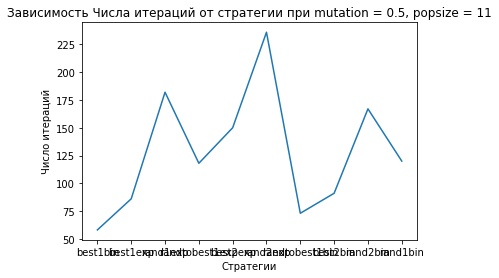

In [54]:
# Получим данные для графика зависимости числа итераций от выбранной стратегии при условии popsize=popsize_opt и mutation=mutation_opt
y = [element["nit"] for element in researches if element["mutation"] == mutation_opt and element["popsize"] == popsize_opt]
x = [element["strategy"] for element in researches if element["mutation"] == mutation_opt and element["popsize"] == popsize_opt]
xlabel = 'Стратегии'
ylabel = 'Число итераций'
title = f'Зависимость Числа итераций от стратегии при mutation = {mutation_opt}, popsize = {popsize_opt}'
get_draw(x,y,xlabel,ylabel,title)

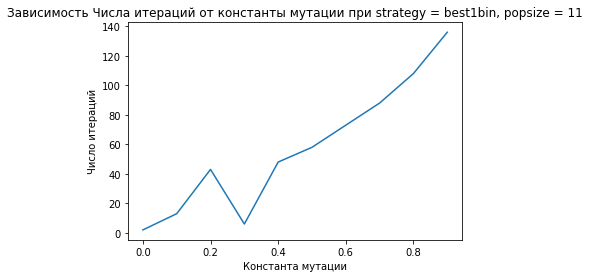

In [56]:
# Получим данные для графика зависимости числа итераций от значения mutation при условии popsize=popsize_opt и strategy=strategy_opt
x = [element["mutation"] for element in researches if element["strategy"] == strategy_opt and element["popsize"] == popsize_opt]
y = [element["nit"] for element in researches if element["strategy"] == strategy_opt and element["popsize"] == popsize_opt]
xlabel = 'Константа мутации'
ylabel = 'Число итераций'
title = f'Зависимость Числа итераций от константы мутации при strategy = {strategy_opt}, popsize = {popsize_opt}'
get_draw(x,y,xlabel,ylabel,title)



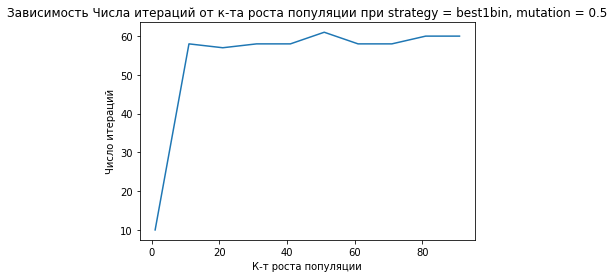

In [57]:
# Получим данные для графика зависимости числа итераций от значения popsize при условии mutation=mutation_opt и strategy=strategy_opt

x = [element["popsize"] for element in researches if element["strategy"] == strategy_opt and element["mutation"] == mutation_opt]
y = [element["nit"] for element in researches if element["strategy"] == strategy_opt and element["mutation"] == mutation_opt]
xlabel = 'К-т роста популяции'
ylabel = 'Число итераций'
title = f'Зависимость Числа итераций от к-та роста популяции при strategy = {strategy_opt}, mutation = {mutation_opt}'
get_draw(x,y,xlabel,ylabel,title)

### Дополнительное задание
Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

In [ ]:
### YOUR CODE HERE

### Вы также можете поэкспериментировать с другими методами оптимизации, но это не обязательно для зачета.